### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data
x = np.linspace(-10, 10, 100)



In [65]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def generate_degrees(source_data: np.ndarray, degree: int):
    """Generates a new feature matrix consisting of all polynomial combinations of the features with degree"""
    return PolynomialFeatures(degree).fit_transform(source_data.reshape(-1, 1))

def train_polynomial(data):
    """Generates data, trains the model, and plots the graph"""
    x_train = data['x_train']
    y_train = data['y_train']
    
    best_degree = 0
    best_score = 0
    
    axs = plt.subplots(5, 2, figsize=(10, 20))[1]  # Create subplots for the unified plot

    for degree in range(1, 11):
        X = generate_degrees(x_train, degree)
        model = LinearRegression().fit(X, y_train)
        y_pred = model.predict(X)
        score = r2_score(y_train, y_pred)
        print(f"Degree of the polynomial {degree}, R2 score: {score:.3f}")

        if score > best_score:
            best_score = score
            best_degree = degree

        # Построение сравнения
        ax = axs[(degree-1)//2, (degree-1)%2]
        ax.plot(x_train, y_pred, label=f'Degree {degree}')
        ax.scatter(x_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
        ax.legend()

    plt.tight_layout()
    plt.show()
    
    plt.scatter(x_train, y_train, 40, 'g', 'o', alpha=0.5, label='data')
    plt.legend()
    plt.show()
    
    print('Best degree:', best_degree, 'Best score:', best_score)


Degree of the polynomial 1, R2 score: 0.559
Degree of the polynomial 2, R2 score: 0.559
Degree of the polynomial 3, R2 score: 0.943
Degree of the polynomial 4, R2 score: 0.943
Degree of the polynomial 5, R2 score: 0.999
Degree of the polynomial 6, R2 score: 0.999
Degree of the polynomial 7, R2 score: 1.000
Degree of the polynomial 8, R2 score: 1.000
Degree of the polynomial 9, R2 score: 1.000
Degree of the polynomial 10, R2 score: 1.000


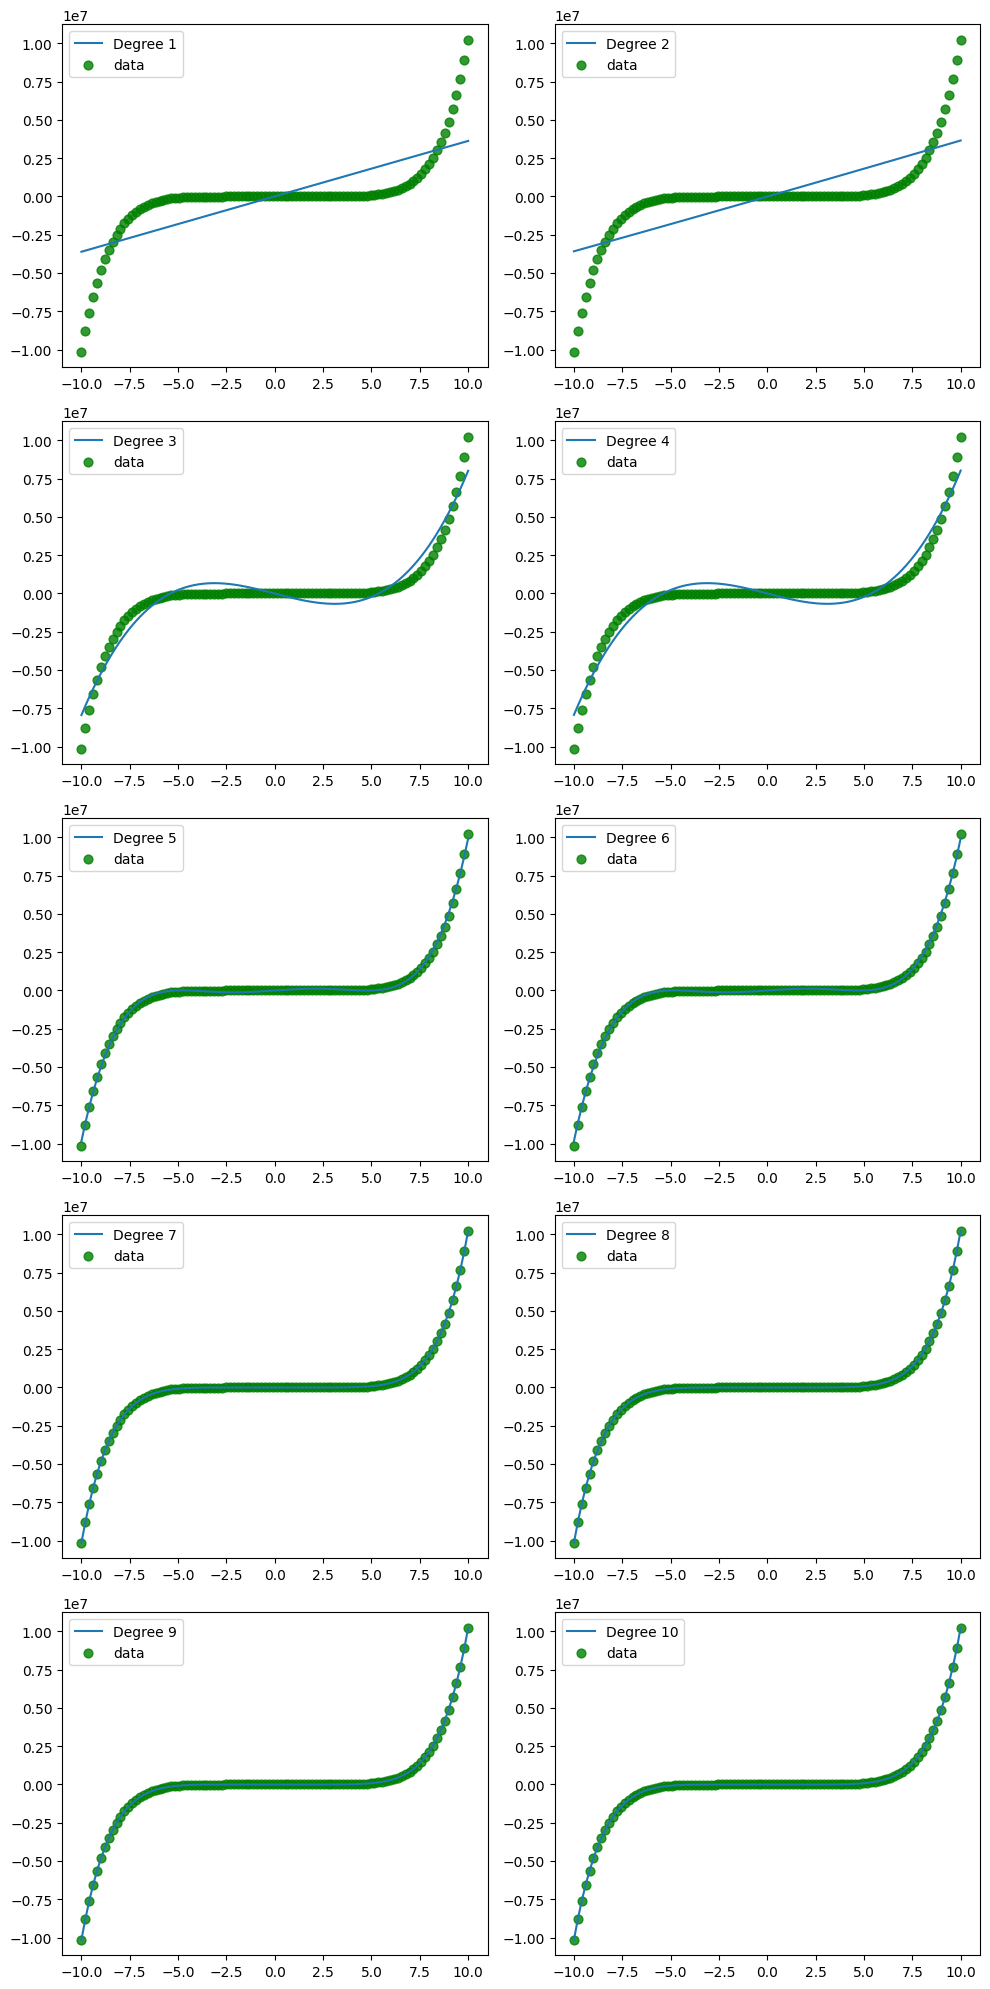

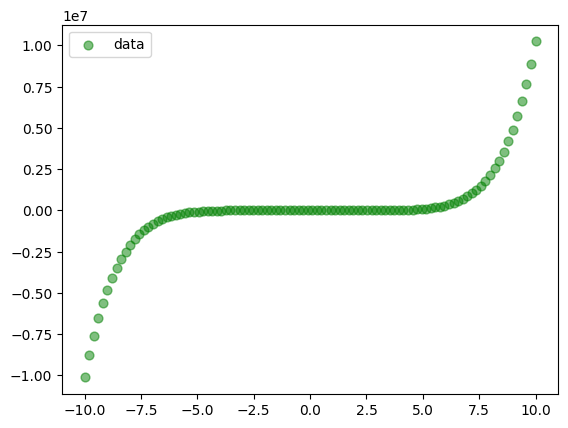

Best degree: 7 Best score: 1.0


In [66]:
# Train the model on some exaple polynomial
data = {
    'x_train': x,
    'y_train': x**7 + 2*x**5 + 5*x**4 - 8*x**3 + x**2 + x + 2
}
train_polynomial(data)


**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [67]:
import numpy as np
from numpy.linalg import inv


class CustomLinearReg:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.w = inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        if self.w is None:
            raise Exception("Fit the model before predicting!")
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.w)

In [68]:
# Generate some data
x = np.linspace(-10, 10, 100)

# Train the model and predict
model = CustomLinearReg()
model.fit(x, - 8*x**3 + x**2 + x + 2)
y_pred = model.predict(x)

# Print coefficients
print(model.w)

[  36.00673401 -488.63167024]


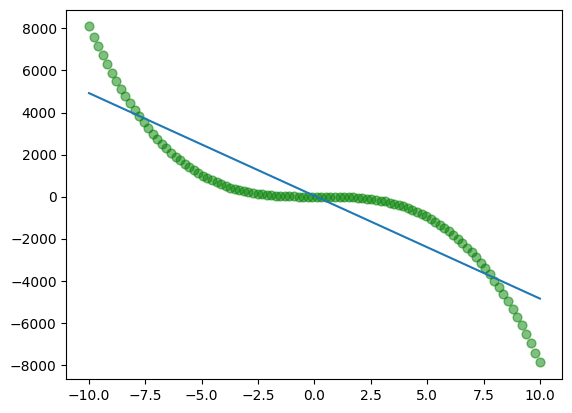

In [69]:
# Plot the graph for data and prediction
plt.scatter(x, - 8*x**3 + x**2 + x + 2, 40, 'g', 'o', alpha=0.5, label='data')
plt.plot(x, y_pred, label='prediction')
plt.show()

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [70]:
from sklearn.datasets import fetch_openml 
 
# Загрузка данных
boston_dataset = fetch_openml(data_id=42165, as_frame=True)

# Убрать строковые признаки
boston_dataset.data = boston_dataset.data.select_dtypes(exclude=['object'])

# Убрать пропущенные значения
boston_dataset.data = boston_dataset.data.dropna()
boston_dataset.target = boston_dataset.target[boston_dataset.data.index]

# Оставим нужные признаки
features = boston_dataset.data
y = boston_dataset.target
print(features.shape, y.shape)

(1121, 37) (1121,)


In [71]:
# Разделение данных на выборки
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(features, y, test_size=0.2, random_state=42)

# Обучение модели
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка качества модели R2-score
from sklearn.metrics import r2_score
y_pred = model.predict(X_valid)
print('R2-score before z-scale: ', r2_score(y_valid, y_pred))


R2-score before z-scale:  0.798191983640558


In [75]:
# Z-scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
# Scale target variable
y_train = y_train.values.reshape(-1, 1)
y_valid = y_valid.values.reshape(-1, 1)

target_scaler = StandardScaler()
target_scaler.fit(y_train)

y_train_scaled = target_scaler.transform(y_train)
y_valid_scaled = target_scaler.transform(y_valid)


# Обучение модели
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Оценка качества модели R2-score
y_pred = model.predict(X_valid_scaled)
print('R2-score after z-scale: ', r2_score(y_valid, y_pred))


R2-score after z-scale:  0.7982357916896463


Можно сделать вывод о том, что после применения z-scale, результат по метрике R2-score немного улучшился. В общем случае необходимо проводить более частную предобработку данных в зависимости от их содержания, а также задачи, которую модель должна решить.